# Business Understanding
For this project, I was interestested using Data Visualization, Model Validation, and XG Boost to Starbucks Customer Survey data for better understand:

1. What factors affect to customers loyalty?
2. How income, location, and visit rate contributed to customers loyalty?
3. What coffee shop classification that can compete Starbucks market?

# Import libraries
Sets up the necessary libraries and modules for data analysis and modeling.

In [1]:
# Set up code checking
import numpy as np
import pandas as pd
pd.plotting.register_matplotlib_converters()
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns

print('Complete')

Complete


# Gather Data
Displays the first few rows of the DataFrame where we can perform further data analysis and manipulation on it.

In [2]:
# Path of the file to read
sb_raw = pd.read_csv("/kaggle/input/starbucks-customer-retention-malaysia-survey/Starbucks satisfactory survey.csv")
sb_raw.head()

,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Starbucks?,6. How do you usually enjoy Starbucks?,7. How much time do you normally spend during your visit?,8. The nearest Starbucks's outlet to you is...?,9. Do you have Starbucks membership card?,...,"11. On average, how much would you spend at Starbucks per visit?","12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Starbucks?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)",16. You rate the WiFi quality at Starbucks as..,"17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)",18. How likely you will choose Starbucks for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Starbucks? Check all that apply.,20. Will you continue buying at Starbucks?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,...,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,...,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,...,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,...,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,...,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


`Count()` method below used to count the number of non-null values in each column of the sb_raw DataFrame and obtain the data type of each column. Additionally, the dtype attribute of the Series will provide the data type of each column.

In [3]:
# Count number & data type
sb_raw.count()

Timestamp                                                                                                                 122
1. Your Gender                                                                                                            122
2. Your Age                                                                                                               122
3. Are you currently....?                                                                                                 122
4. What is your annual income?                                                                                            122
5. How often do you visit Starbucks?                                                                                      122
6. How do you usually enjoy Starbucks?                                                                                    121
7. How much time do you normally  spend during your visit?                                                            

`Copy()` method creates a deep copy of the DataFrame, including the data and the column labels.
By creating a copy, we can work with sb_data instead of sb_raw and make modifications or perform analysis on the copied DataFrame without affecting the original data.

In [4]:
# Create a copy of a pandas data frame
sb_data = sb_raw.copy()
print('Complete')

Complete


# Clean Data
Removes the 'Timestamp' column from the sb_data DataFrame using the `drop()` method

In [5]:
# Remove the 'Timestamp' column for simplifying data
sb_data.drop(columns=['Timestamp'], inplace = True)

print('Complete')

Complete


Renames the columns in the sb_data DataFrame to simplify the column names using `rename()` method. This will help time efficiency in data analysis and manipulation.

In [6]:
# Rename column for simplifying data

sb_data.rename({"1. Your Gender": 'gender',
                                "2. Your Age": "age",
                                "3. Are you currently....?":"status",
                                "4. What is your annual income?":"income",
                                "5. How often do you visit Starbucks?":"visit",
                                "6. How do you usually enjoy Starbucks?":"howEnjoy",
                                "7. How much time do you normally  spend during your visit?":"timeSpend",
                                "8. The nearest Starbucks's outlet to you is...?":"location",
                                "9. Do you have Starbucks membership card?":"membership",
                                "10. What do you most frequently purchase at Starbucks?":"purchaseOften",
                                "11. On average, how much would you spend at Starbucks per visit?":"moneySpend",
                                "12. How would you rate the quality of Starbucks compared to other brands (Coffee Bean, Old Town White Coffee..) to be:":"rateQuality",
                                "13. How would you rate the price range at Starbucks?":"ratePrice",
                                "14. How important are sales and promotions in your purchase decision?":"rateSalesPromo",
                                "15. How would you rate the ambiance at Starbucks? (lighting, music, etc...)":"rateAmbience",
                                "16. You rate the WiFi quality at Starbucks as..":"rateWifi",
                                "17. How would you rate the service at Starbucks? (Promptness, friendliness, etc..)":"rateService",
                                "18. How likely you will choose Starbucks for doing business meetings or hangout with friends?":"rateComing",
                                "19. How do you come to hear of promotions at Starbucks? Check all that apply.":"howComing",
                                "20. Will you continue buying at Starbucks?":"buyAgain",
                                 }, inplace = True , axis = 1)

sb_data.head()

,gender,age,status,income,visit,howEnjoy,timeSpend,location,membership,purchaseOften,moneySpend,rateQuality,ratePrice,rateSalesPromo,rateAmbience,rateWifi,rateService,rateComing,howComing,buyAgain
0,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


# Visualize & Analyze Data
Creates a histogram to compare the income distribution of customers who will buy again versus those who will not based on income range. From this output we can get a conclusions that income is considered affect customer loyalty.

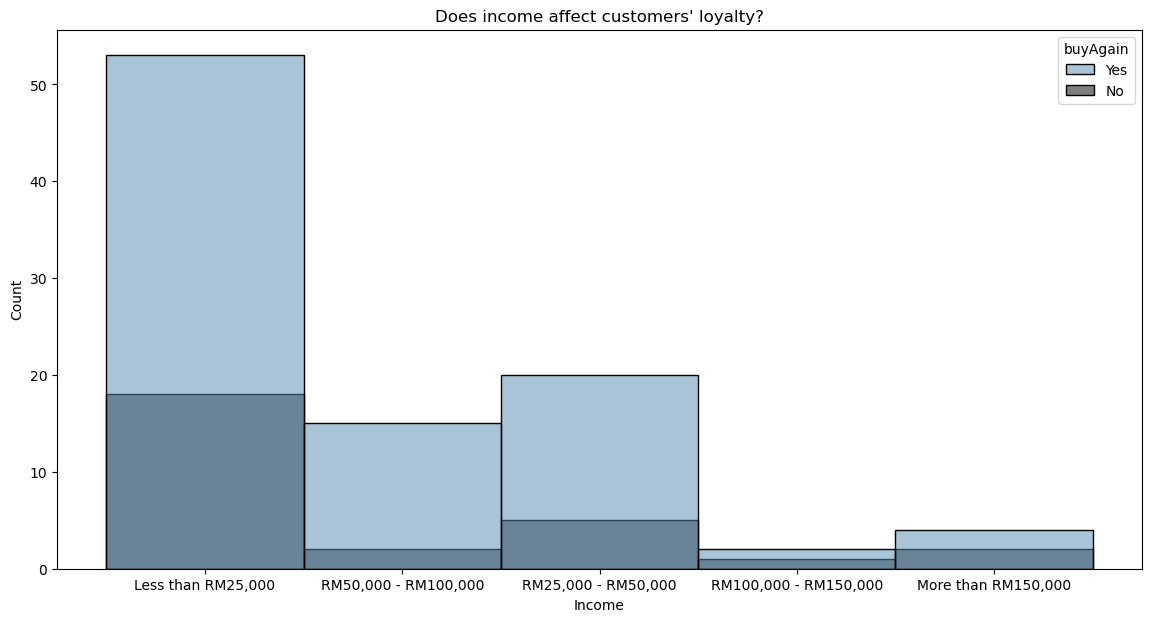

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_income_vs_loyalty(data):
    """
    Plot a histogram showing the comparison between income and customer loyalty.

    Args:
    - data (DataFrame): Input data containing the 'income' and 'buyAgain' columns

    Returns:
    - None
    """

    # Create and set figure size
    plt.figure(figsize=(14, 7))

    # Set figure color
    colors = ["#528AAE", "#000000"]

    # Histogram showing comparison between income and customer who will buy again
    sns.histplot(data=data, x='income', hue='buyAgain', palette=colors, alpha=0.5)

    # Set figure title and labels
    plt.title("Does income affect customers' loyalty?")
    plt.xlabel("Income")
    plt.ylabel("Count")

    plt.show()

# Call the function with the dataset
plot_income_vs_loyalty(sb_data)

Histogram below show that visit rate doesn’t really affect customer loyalty.

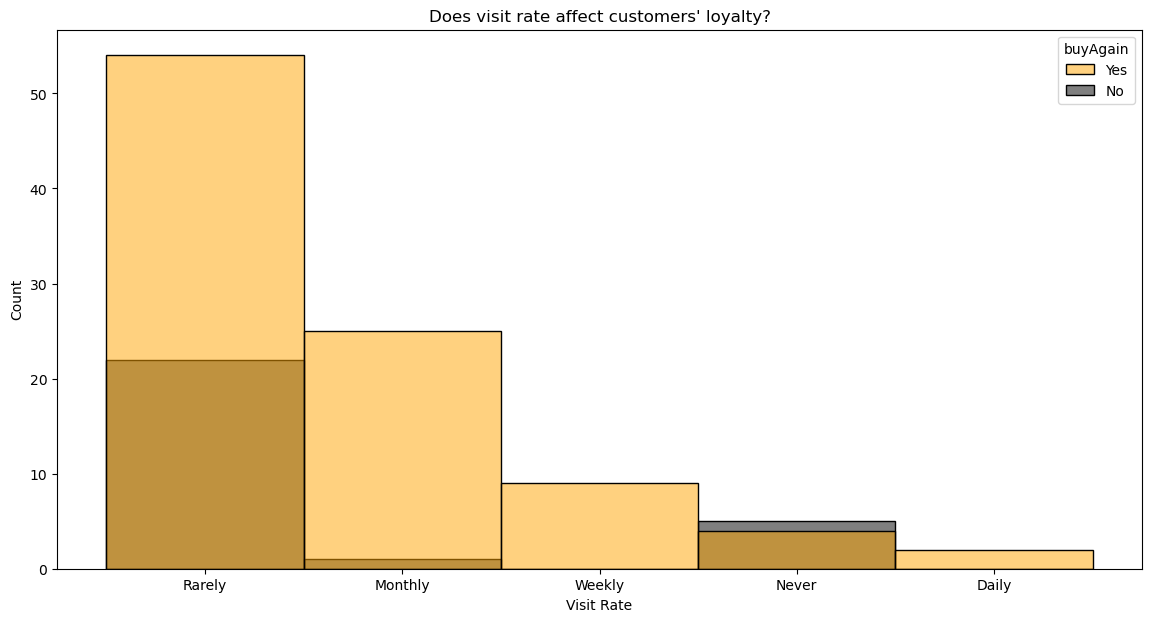

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_visit_rate_vs_loyalty(data):
    """
    Plot a histogram showing the comparison between visit rate and customer loyalty.

    Args:
    - data (DataFrame): Input data containing the 'visit' and 'buyAgain' columns

    Returns:
    - None
    """

    # Create and set figure size
    plt.figure(figsize=(14, 7))

    # Set figure color
    colors = ["#FFA500", "#000000"]

    # Histogram showing comparison between visit rate and customer who will buy again
    sns.histplot(data=data, x='visit', hue='buyAgain', palette=colors, alpha=0.5)

    # Set figure title and labels
    plt.title("Does visit rate affect customers' loyalty?")
    plt.xlabel("Visit Rate")
    plt.ylabel("Count")

    plt.show()

# Call the function with the dataset
plot_visit_rate_vs_loyalty(sb_data)

Histogram below show that closer location or distance doesn’t really affect customer loyalty.

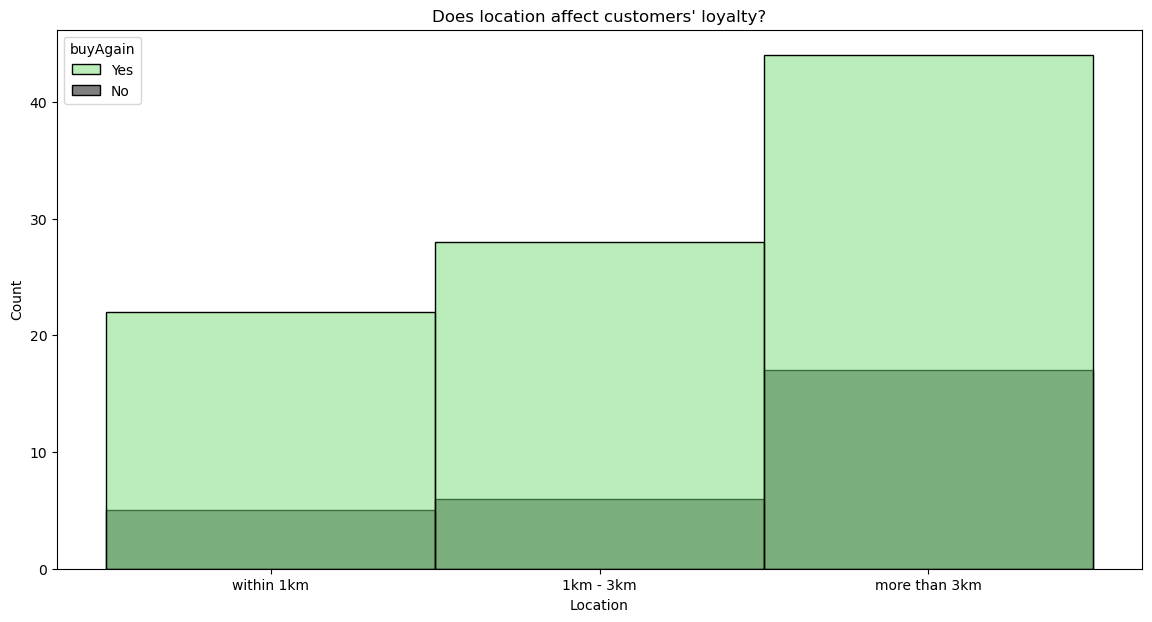

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_location_vs_loyalty(data):
    """
    Plot a histogram showing the comparison between location and customer loyalty.

    Args:
    - data (DataFrame): Input data containing the 'location' and 'buyAgain' columns

    Returns:
    - None
    """

    # Create and set figure size
    plt.figure(figsize=(14, 7))

    # Set figure color
    colors = ["#77DD77", "#000000"]

    # Histogram showing comparison between location and customer who will buy again
    sns.histplot(data=data, x='location', hue='buyAgain', palette=colors, alpha=0.5)

    # Set figure title and labels
    plt.title("Does location affect customers' loyalty?")
    plt.xlabel("Location")
    plt.ylabel("Count")

    plt.show()

# Call the function with the dataset
plot_location_vs_loyalty(sb_data)

Scatter plot below show the relationship between income and customers who will buy again. the result is directly proportional to the previous histogram.

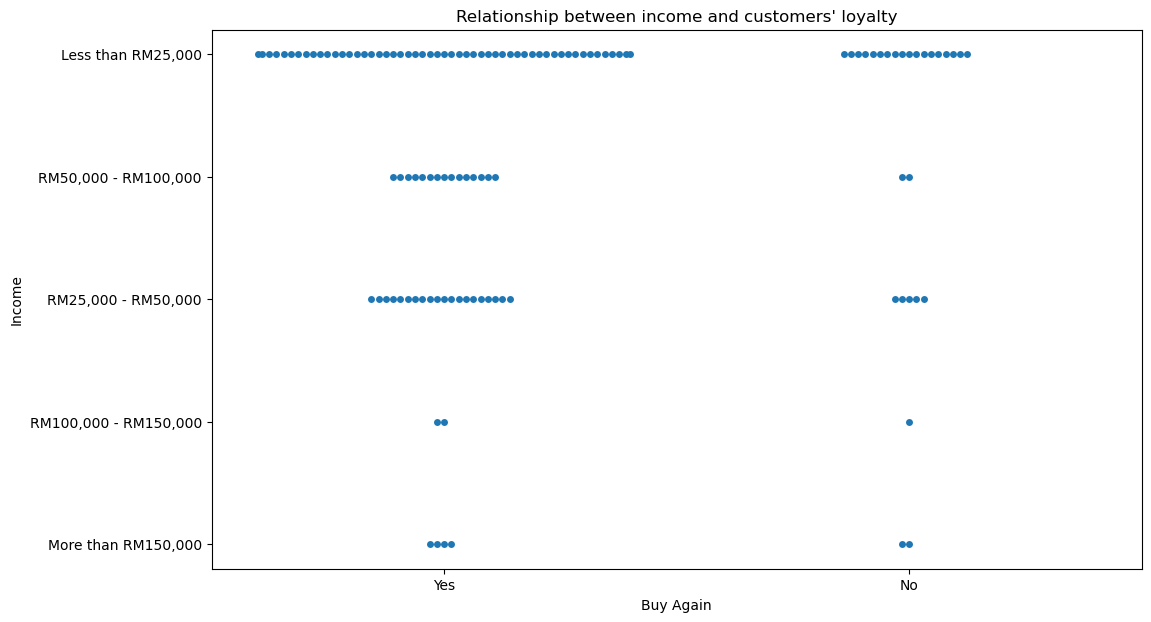

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_income_vs_loyalty(data):
    """
    Plot a swarm plot showing the relationship between income and customer loyalty.

    Args:
    - data (DataFrame): Input data containing the 'income' and 'buyAgain' columns

    Returns:
    - None
    """

    # Create and set figure size
    plt.figure(figsize=(12, 7))

    # Scatter plot showing the relationship between income and customer who will buy again
    sns.swarmplot(x=data['buyAgain'], y=data['income'])

    # Set figure title and labels
    plt.title("Relationship between income and customers' loyalty")
    plt.xlabel("Buy Again")
    plt.ylabel("Income")

    plt.show()

# Call the function with the dataset
plot_income_vs_loyalty(sb_data)

Scatter plot below show the relationship between location and customers who will buy again. the result is directly proportional to the previous histogram.

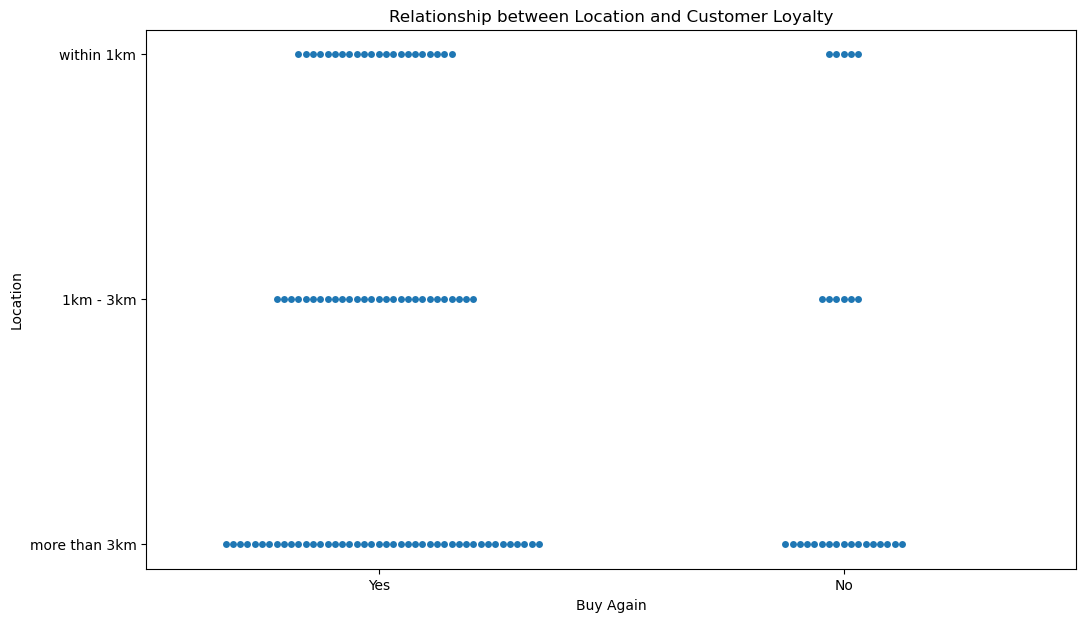

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_location_vs_loyalty(data):
    """
    Plot a scatter plot showing the relationship between location and customer loyalty.

    Args:
        data (DataFrame): The dataset containing the location and loyalty information.
    """
    # Create and set figure size
    plt.figure(figsize=(12,7))

    # Scatter plot showing the relationship between location and customer loyalty
    sns.swarmplot(x=data['buyAgain'],
                  y=data['location'])

    # Set figure title and labels
    plt.title("Relationship between Location and Customer Loyalty")
    plt.xlabel("Buy Again")
    plt.ylabel("Location")

    # Show the plot
    plt.show()
    
# Call the function with the dataset
plot_scatter_location_vs_loyalty(sb_data)

Scatter plot below show the relationship between visit rate and customers who will buy again. the result is directly proportional to the previous histogram.

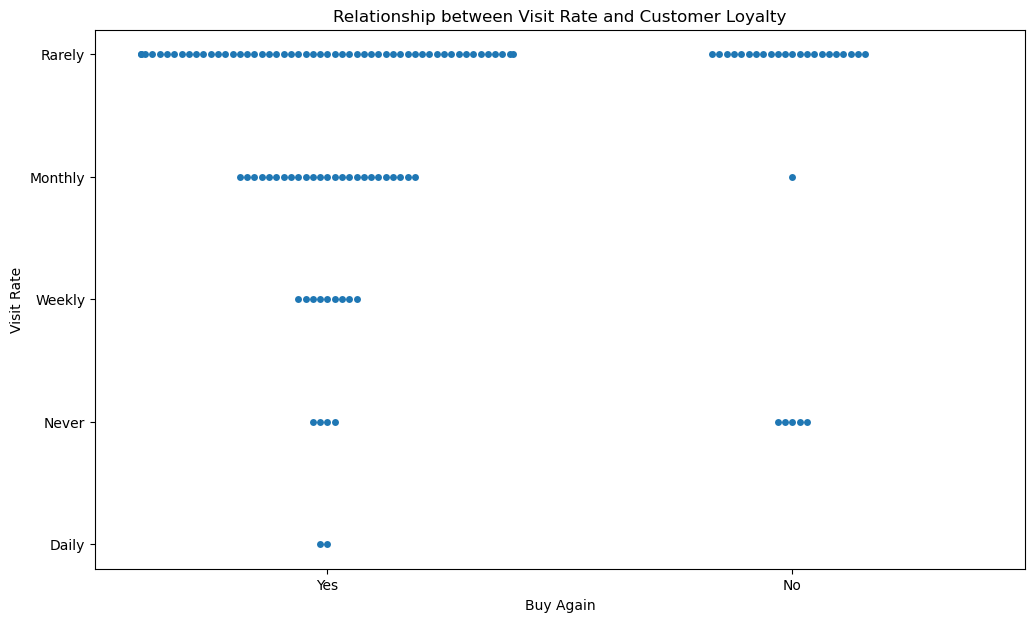

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_scatter_visit_vs_loyalty(data):
    """
    Plot a scatter plot showing the relationship between visit rate and customer loyalty.

    Args:
        data (DataFrame): The dataset containing the visit rate and loyalty information.
    """
    # Create and set figure size
    plt.figure(figsize=(12, 7))

    # Scatter plot showing the relationship between visit rate and customer loyalty
    sns.swarmplot(x=data['buyAgain'], y=data['visit'])

    # Set figure title and labels
    plt.title("Relationship between Visit Rate and Customer Loyalty")
    plt.xlabel("Buy Again")
    plt.ylabel("Visit Rate")

    # Show the plot
    plt.show()
    
# Call the function with the dataset
plot_scatter_visit_vs_loyalty(sb_data)

# Conclusion
From data illustration above we could say that:

1. We gathered information that income is considered to affect customer loyalty.
2. If we want to open a coffee shop that compete with Starbucks market, districts and areas that have an average income less than RM25,000 are the best spot to look for.
3. Location, distance, and visit rate are classification that doesn’t matched with customer loyalty. So no worries about that.